In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('medical2.jpg', cv2.IMREAD_GRAYSCALE)

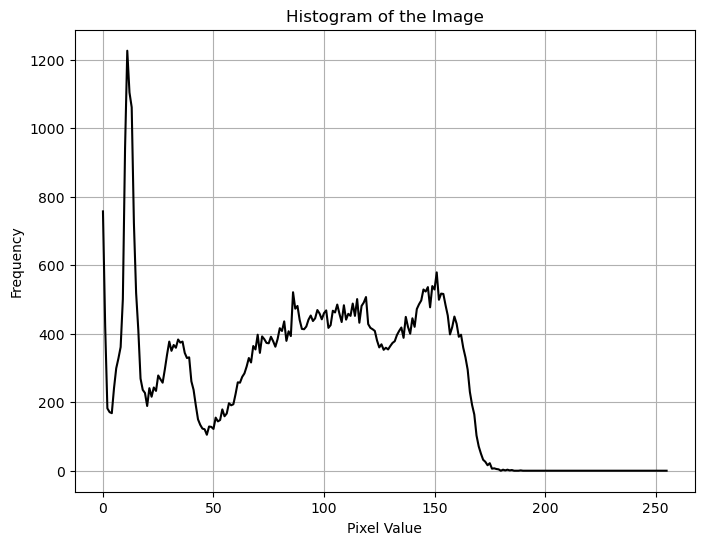

In [5]:

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Calculate histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plot the histogram
    plt.figure(figsize=(8, 6))
    plt.plot(hist, color='black')
    plt.title('Histogram of the Image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

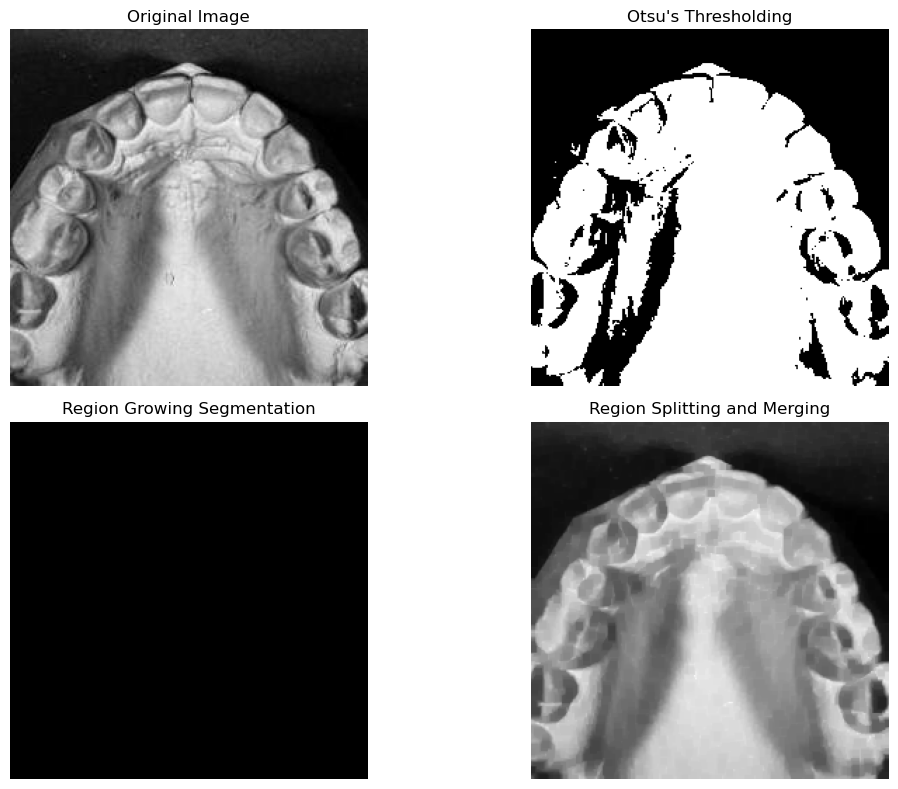

In [4]:


# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Otsu's thresholding for image segmentation
    _, otsu_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Region growing segmentation using OpenCV (seed-filling algorithm)
    def region_growing_opencv(image, seed):
        segmented = np.zeros_like(image)
        h, w = image.shape
        mask = np.zeros((h + 2, w + 2), dtype=np.uint8)
        cv2.floodFill(image, mask, seed, 255, flags=cv2.FLOODFILL_MASK_ONLY)
        segmented[mask[1:-1, 1:-1] == 255] = 255
        return segmented

    seed_point = (100, 100)  # Define a seed point for region growing
    region_grown = region_growing_opencv(image, seed_point)

    # Region splitting and merging (Example: Dilation followed by Erosion for demonstration)
    kernel = np.ones((5, 5), np.uint8)
    dilation = cv2.dilate(image, kernel, iterations=1)
    region_split_merge = cv2.erode(dilation, kernel, iterations=1)

    # Display the original and segmented images using Matplotlib
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(otsu_threshold, cmap='gray')
    plt.title("Otsu's Thresholding")
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(region_grown, cmap='gray')
    plt.title('Region Growing Segmentation')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(region_split_merge, cmap='gray')
    plt.title('Region Splitting and Merging')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
